In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sqlite3, requests
from zipfile import ZipFile
from io import BytesIO
# !pip install ipython-sql
pd.set_option("display.max_columns", None)

# Download data from WB

In [3]:
# download dataset from the world bank
print("Starting download datasets...")
url = "https://databank.worldbank.org/data/download/IDS_CSV.zip"
file_name = url.split("/")[-1]
res = requests.get(url)
zf = ZipFile(BytesIO(res.content))
zf.extractall("../data")
print(f"{file_name} downloaded and unzipped!")

Starting download datasets...
IDS_CSV.zip downloaded and unzipped!


In [4]:
os.listdir("../data")

['IDS_Footnotes.csv',
 '.DS_Store',
 'int_debt.db',
 'IDS_Series-TimeMetaData.csv',
 'IDS_ALLCountries_Data.csv',
 'IDS_Country-SeriesMetaData.csv',
 'IDS_CountryMetaData.csv',
 'IDS_SeriesMetaData.csv']

# EDA the dataset

In [5]:
int_debt_df = pd.read_csv("../data/IDS_ALLCountries_Data.csv")
int_debt_df.shape

(77389, 65)

In [6]:
int_debt_df.head()

,Country Name,Country Code,Counterpart-Area Name,Counterpart-Area Code,Series Name,Series Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,Afghanistan,AFG,World,WLD,Average grace period on new external debt comm...,DT.GPA.DPPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.2500,8.0833,9.9575,0.0,7.8333,0.0,0.0,0.0,29.8333,0.0,0.0,19.8356,0.0,17.9041,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,World,WLD,Average grace period on new external debt comm...,DT.GPA.OFFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.2500,8.0833,9.9575,0.0,7.8333,0.0,0.0,0.0,29.8333,0.0,0.0,19.8356,0.0,17.9041,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,World,WLD,Average grace period on new external debt comm...,DT.GPA.PRVT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,World,WLD,Average grant element on new external debt com...,DT.GRE.DPPG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.6176,43.0248,58.0061,0.0,21.2119,0.0,0.0,0.0,81.9289,0.0,0.0,64.2646,0.0,73.0790,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,World,WLD,Average grant element on new external debt com...,DT.GRE.OFFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.6176,43.0248,58.0061,0.0,21.2119,0.0,0.0,0.0,81.9289,0.0,0.0,64.2646,0.0,73.0790,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataset appears to be in a wide format with each year data value in each column. As I'm used to working with panel data, I want to convert this into a long format in which each year value has a row. The combination of country code, series code, and year would create a unique key.

In [7]:
int_debt_df.columns

Index(['Country Name', 'Country Code', 'Counterpart-Area Name',
       'Counterpart-Area Code', 'Series Name', 'Series Code', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025',
       '2026', '2027', '2028'],
      dtype='object')

In [8]:
int_debt_long_df = pd.melt(int_debt_df, id_vars=['Country Name', 'Country Code', 'Counterpart-Area Name',
       'Counterpart-Area Code', 'Series Name', 'Series Code'], var_name="year", value_name="debt_amount")

In [9]:
int_debt_long_df.head()

,Country Name,Country Code,Counterpart-Area Name,Counterpart-Area Code,Series Name,Series Code,year,debt_amount
0,Afghanistan,AFG,World,WLD,Average grace period on new external debt comm...,DT.GPA.DPPG,1970,NaN
1,Afghanistan,AFG,World,WLD,Average grace period on new external debt comm...,DT.GPA.OFFT,1970,NaN
2,Afghanistan,AFG,World,WLD,Average grace period on new external debt comm...,DT.GPA.PRVT,1970,NaN
3,Afghanistan,AFG,World,WLD,Average grant element on new external debt com...,DT.GRE.DPPG,1970,NaN
4,Afghanistan,AFG,World,WLD,Average grant element on new external debt com...,DT.GRE.OFFT,1970,NaN


In [10]:
del int_debt_df
int_debt_long_df = int_debt_long_df.rename(columns={'Country Name':"country_name", 'Country Code':"country_code", 'Counterpart-Area Name':"counterpart_area_name",
       'Counterpart-Area Code':"counterpart_area_code", 'Series Name':"series_name", 'Series Code':"series_code"})

In [11]:
int_debt_long_df.columns

Index(['country_name', 'country_code', 'counterpart_area_name',
       'counterpart_area_code', 'series_name', 'series_code', 'year',
       'debt_amount'],
      dtype='object')

# Create a new database
Here I create a new sqlite3 db from the IDS_ALLCountries_Data.csv. Since my purpose here is to do some analysis using sql

In [12]:
conn = sqlite3.connect("../data/int_debt.db")
cur = conn.cursor()

In [14]:
cur.execute('''CREATE TABLE debts (country_name text, country_code int, counterpart_area_name text, counterpart_area_code int, series_name text, series_code int, year int, debt_amount float)''')

In [ ]:
int_debt_long_df.to_sql("debts", conn, if_exists="append", index=False)

Now I have a db in my data folder. Let's do some analysis using sql.

In [15]:
%load_ext sql

In [16]:
%sql sqlite:///../data/int_debt.db

Get column names from the table. This is quite specific to sqlite

In [17]:
%%sql
PRAGMA table_info("debts")

 * sqlite:///../data/int_debt.db
Done.


cid,name,type,notnull,dflt_value,pk
0,country_name,TEXT,0,None,0
1,country_code,INT,0,None,0
2,counterpart_area_name,TEXT,0,None,0
3,counterpart_area_code,INT,0,None,0
4,series_name,TEXT,0,None,0
5,series_code,INT,0,None,0
6,year,INT,0,None,0
7,debt_amount,float,0,None,0


Now get all the country names and codes

In [95]:
%%sql 
SELECT DISTINCT country_name, country_code
FROM debts
LIMIT 10

 * sqlite:///../data/int_debt.db
Done.


country_name,country_code
Afghanistan,AFG
Albania,ALB
Algeria,DZA
Angola,AGO
Argentina,ARG
Armenia,ARM
Azerbaijan,AZE
Bangladesh,BGD
Belarus,BLR
Belize,BLZ


How many countries in the dataset

In [32]:
%%sql
SELECT COUNT(DISTINCT country_code) as number_countries
FROM debts
WHERE country_code IS NOT NULL

 * sqlite:///../data/int_debt.db
Done.


number_countries
136


In [94]:
%%sql
SELECT COUNT(DISTINCT series_code) AS distinct_indicators
FROM debts
WHERE series_code IS NOT NULL

 * sqlite:///../data/int_debt.db
Done.


distinct_indicators
569


I'm interested in how the debt changes over the years in some countries.

In [49]:
total_ann_debt_by_country = %sql \
SELECT country_code, year, SUM(debt_amount)/1000000 AS total_debt \
FROM debts \
WHERE country_code IS NOT NULL AND country_code!="None"\
GROUP BY country_code, year
total_ann_debt_by_country = total_ann_debt_by_country.DataFrame()
total_ann_debt_by_country.shape

 * sqlite:///../data/int_debt.db
Done.


(8024, 3)

In [51]:
total_ann_debt_by_country.head()

,country_code,year,total_debt
0,AFG,1970,0.0
1,AFG,1971,0.0
2,AFG,1972,0.0
3,AFG,1973,0.0
4,AFG,1974,0.0


I can't wait to plot some countries debt overtime now.

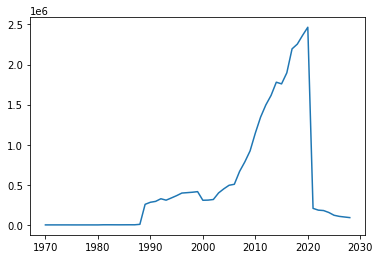

In [55]:
vnm_debt = total_ann_debt_by_country.loc[total_ann_debt_by_country["country_code"]=="VNM", ["year", "total_debt"]]
plt.plot(vnm_debt["year"], vnm_debt["total_debt"])
plt.show()

Text(0.5, 1.0, 'Vietnam Public Debt Over Time')

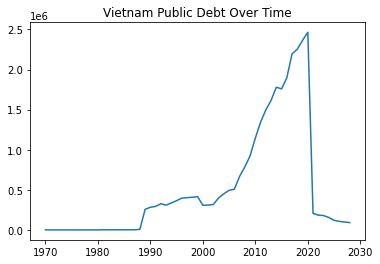

In [57]:
# use subplot
fix, ax = plt.subplots()
ax.plot(vnm_debt["year"], vnm_debt["total_debt"])
ax.set_title("Vietnam Public Debt Over Time")

In [60]:
total_ann_debt_by_country.country_code.unique()

array(['AFG', 'AGO', 'ALB', 'ARG', 'ARM', 'AZE', 'BDI', 'BEN', 'BFA',
       'BGD', 'BGR', 'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BTN', 'BWA',
       'CAF', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV',
       'CRI', 'DJI', 'DMA', 'DOM', 'DZA', 'EAP', 'ECA', 'ECU', 'EGY',
       'ERI', 'ETH', 'FJI', 'GAB', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB',
       'GRD', 'GTM', 'GUY', 'HND', 'HTI', 'IDN', 'IDX', 'IND', 'IRN',
       'JAM', 'JOR', 'KAZ', 'KEN', 'KGZ', 'KHM', 'LAC', 'LAO', 'LBN',
       'LBR', 'LCA', 'LDC', 'LIC', 'LKA', 'LMC', 'LMY', 'LSO', 'MAR',
       'MDA', 'MDG', 'MDV', 'MEX', 'MIC', 'MKD', 'MLI', 'MMR', 'MNA',
       'MNE', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI', 'NER', 'NGA', 'NIC',
       'NPL', 'PAK', 'PAN', 'PER', 'PHL', 'PNG', 'PRY', 'ROU', 'RUS',
       'RWA', 'SAS', 'SDN', 'SEN', 'SLB', 'SLE', 'SLV', 'SOM', 'SRB',
       'SSA', 'STP', 'SWZ', 'SYR', 'TCD', 'TGO', 'THA', 'TJK', 'TKM',
       'TLS', 'TON', 'TUN', 'TUR', 'TZA', 'UGA', 'UKR', 'UMC', 'UZB',
       'VCT', 'VEN',

Text(0.5, 1.0, 'China Public Debt Over Time')

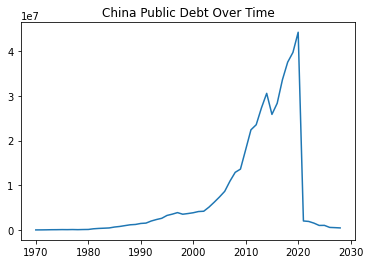

In [63]:
china_debt = total_ann_debt_by_country.loc[total_ann_debt_by_country["country_code"]=="CHN", ["year", "total_debt"]]
fix, ax = plt.subplots()
ax.plot(china_debt["year"], china_debt["total_debt"])
ax.set_title("China Public Debt Over Time")

The actual data might have been available until 2020-2021.

## Countries with the most debt in a category

In [87]:
%%sql
SELECT country_code, country_name, MAX(debt_amount)/1000000 AS max_debt
FROM debts
WHERE country_code IS NOT NULL AND country_code != "None"
GROUP BY country_code
ORDER BY max_debt DESC
--DROP COLUMN country_code

 * sqlite:///../data/int_debt.db
Done.


country_code,country_name,max_debt
LMY,Low & middle income,31018300.0
MIC,Middle income,30522400.0
UMC,Upper middle income,22899100.0
EAP,East Asia & Pacific (excluding high income),16949200.0
CHN,China,14623700.0
LMC,Lower middle income,7623330.0
LAC,Latin America & Caribbean (excluding high income),5244540.0
ECA,Europe & Central Asia (excluding high income),4202410.0
SAS,South Asia,3575860.0
IND,India,2843270.0


I should exclude the regions. A task for another day.

## Which country has the highest total debt?

In [92]:
%%sql
SELECT country_code, country_name, SUM(debt_amount)/1000000 as total_debt
FROM debts
WHERE country_code IS NOT NULL AND country_code != "None"
GROUP BY country_code
ORDER BY total_debt DESC
LIMIT 1

 * sqlite:///../data/int_debt.db
Done.


country_code,country_name,total_debt
LMY,Low & middle income,2427816279.4768467


How about only the max row?